<a href="https://colab.research.google.com/github/Taghr66d/MSc-SummerProject2025/blob/main/1stCNN_for_Cusps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:

X = np.load("X_cusp_dataset.npy")
y = np.load("y_cusp_labels.npy")
print(X.shape, y.shape)


(6000, 8192) (6000,)


In [3]:
# Reshape for Conv1D: (samples, timesteps, channels)
X_reshaped = X[..., np.newaxis]


X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)


model = Sequential([
    Conv1D(16, kernel_size=16, activation='relu', input_shape=(8192, 1)),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),

    Conv1D(32, kernel_size=8, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),

    Conv1D(64, kernel_size=8, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=4),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=10, batch_size=64)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 58s 704ms/step - accuracy: 0.5018 - loss: 1.0702 - val_accuracy: 0.4892 - val_loss: 1.7356
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 53s 688ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.4892 - val_loss: 1.6833
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 78s 656ms/step - accuracy: 0.4972 - loss: 0.6931 - val_accuracy: 0.5333 - val_loss: 0.9384
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 641ms/step - accuracy: 0.4880 - loss: 0.6938 - val_accuracy: 0.5683 - val_loss: 0.7530
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 647ms/step - accuracy: 0.4953 - loss: 0.6931 - val_accuracy: 0.4892 - val_loss: 0.6868
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 81s 633ms/step - accuracy: 0.4951 - loss: 0.6938 - val_accuracy: 0.4892 - val_loss: 0.6932
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 84s 657ms/step - accuracy: 0.5148 - loss: 0.6926 - val_accuracy: 0.4892 - val_loss: 0.6932
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 629ms/step - accuracy: 0.5068 - loss: 0.6926 - val_accu

In [4]:
model.evaluate(X_test, y_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9714 - loss: 0.3472


[0.35069045424461365, 0.9733333587646484]

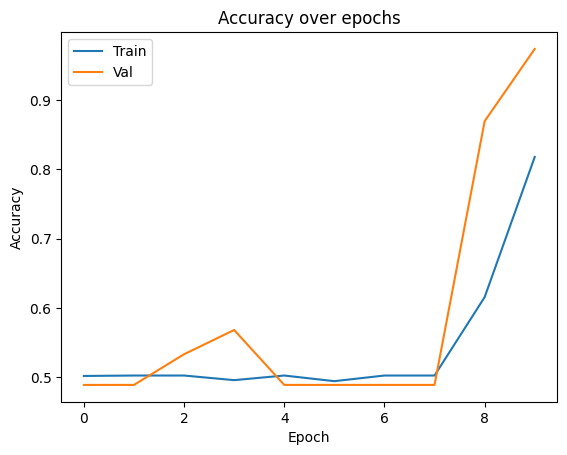

In [5]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
